# Toy NN
### A minimal python NN library for multilayer neural nets.
There's a lot of these out there doing this with numpy in 11 lines of code or so; but I wanted this to be:
- easily extendable, so had to be at least a little object oriented
- multilayer; most of the minimal example have one or two hardcoded layers
- have customizable loss and activation functions. 

In the end this has 43 lines of codes, so I would argue it's still pretty minimal :)


## Usage
We're going to try to learn the classic `XOR` function using a couple of layers. Very similar to the scikit-learn example seen [here](http://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from toynn import NN, sigmoid, mse
%matplotlib inline

In [2]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                    np.linspace(-3, 3, 500))
X = np.random.randn(300,2)

We drew `X` at random, now we label the points according to the `XOR` rule:

In [3]:
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

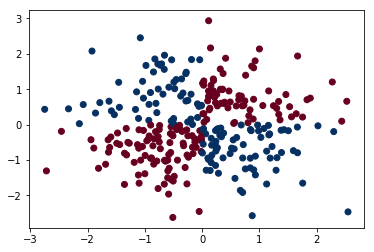

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='RdBu');

Now we create our model and fit to data; we will use a three layer network with 20 hidden neurons for each. Note that the input dimension is two (a point in 2D space) and that the output dimension is one (true or false).

In [5]:
model = NN(layers=[(2, 20), (20, 20),  (20, 1)],
          activation=sigmoid,
          loss=mse)

In [6]:
model.train(X, Y, learning_rate = 1, n_train=40000)

iteration 0 of 40000, loss: 0.24787
iteration 4000 of 40000, loss: 0.24478
iteration 8000 of 40000, loss: 0.08303
iteration 12000 of 40000, loss: 0.02562
iteration 16000 of 40000, loss: 0.01815
iteration 20000 of 40000, loss: 0.01273
iteration 24000 of 40000, loss: 0.00959
iteration 28000 of 40000, loss: 0.00755
iteration 32000 of 40000, loss: 0.00600
iteration 36000 of 40000, loss: 0.00476


Allright, pretty good training loss, let's vizualize the results:

In [7]:
yhat = model.predict(np.c_[xx.ravel(), yy.ravel()])
yhat = yhat.reshape(xx.shape)

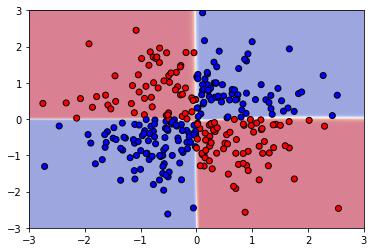

In [8]:
plt.imshow(yhat, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap='coolwarm', alpha=0.5);

plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap='bwr');
plt.axis([-3,3,-3,3]);

The data is in the scatter plot, and our predictions for all plots in the grid are the background colors: we managed to learn the XOR rule!